In [ ]:
#Breast Cancer Detection Classifier Model

In [2]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read in Dataset
breast_cancer_data = pd.read_csv("Breast_cancer_data.csv")

In [5]:
#Visualize the data columns
breast_cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
#Summarize the data
breast_cancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


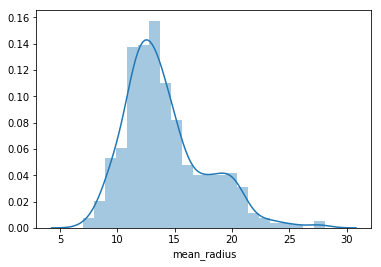

In [9]:
#Visualize the distributions of the variables
sns.distplot(breast_cancer_data['mean_radius'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


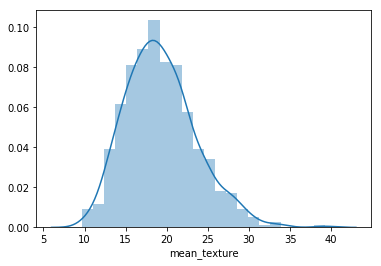

In [10]:
sns.distplot(breast_cancer_data['mean_texture'])
#Distribution plot appears to be normal with a slight skew

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


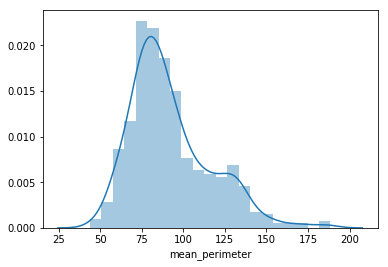

In [11]:
sns.distplot(breast_cancer_data['mean_perimeter'])
#Distribtuion has skewness

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


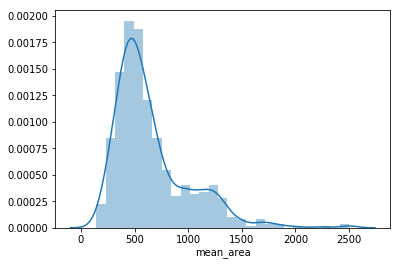

In [12]:
sns.distplot(breast_cancer_data['mean_area'])
#Distribtuion has skewness

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


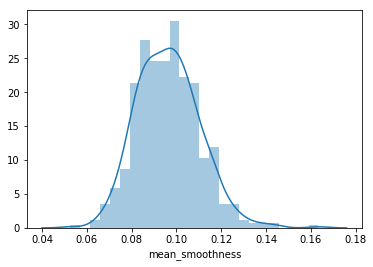

In [13]:
sns.distplot(breast_cancer_data['mean_smoothness'])
#Distribtuion appears normal

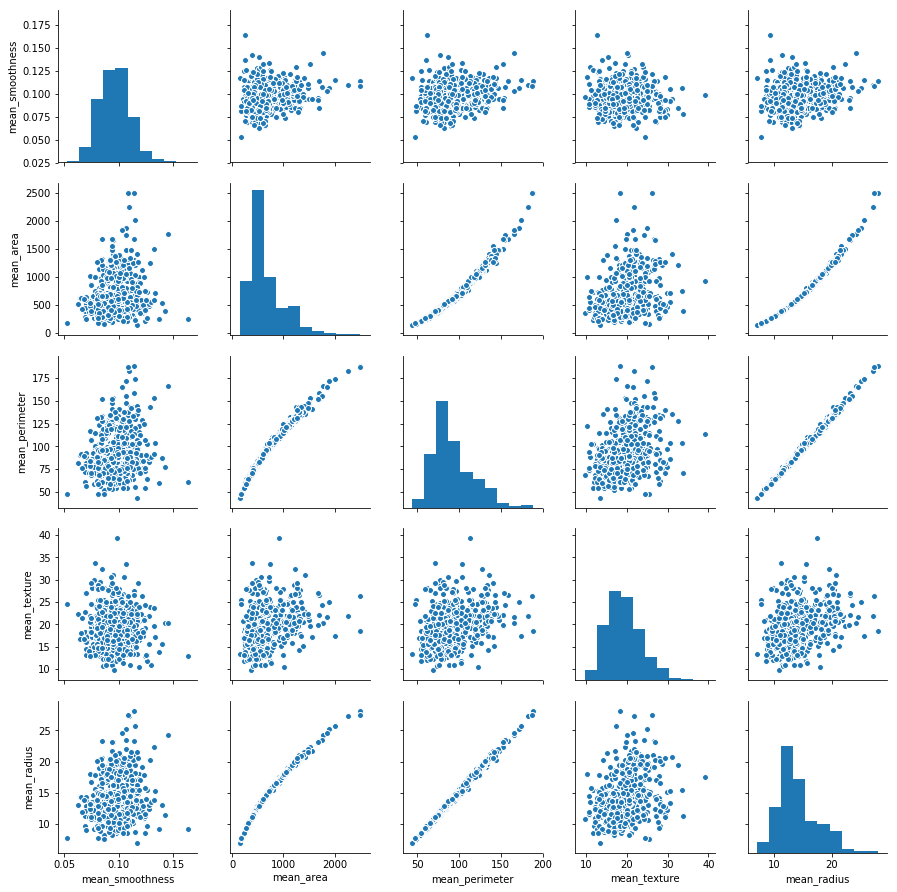

In [18]:
#View the pair plots for the data to see realtionships between two variables
#In some variables we can see clear linear realtionship
sns.pairplot(breast_cancer_data[['mean_smoothness','mean_area', 'mean_perimeter', 'mean_texture','mean_radius']],
             palette = sns.color_palette("GnBu_d"), size=2.5)

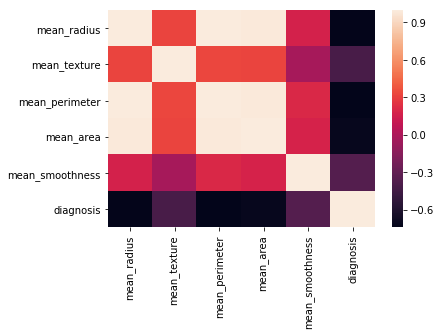

In [19]:
#Use correlation heat map matrix to see linear realtionship between variables
corr = breast_cancer_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [44]:
#Split the data into independent and dependent variables 
X = breast_cancer_data.iloc[:, : -1].values
y = breast_cancer_data.iloc[:, -1].values

In [45]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [46]:
#Use PCA to reduce variables because some show linear correlation to each other
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [47]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
X

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578,  0.57795264, -0.84048388],
       [ 1.83834103,  2.33645719,  1.98252415,  1.73521799,  1.52576706],
       [-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479]])

In [49]:
#Use the PCA, to reduce variables. This prevents overfitting as well
X = pca.fit_transform(X)

In [51]:
#Split dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [61]:
#Apply Random Forest Algorithim
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
random_forest.fit(X_train,y_train)
y_predicted = []
y_predicted = random_forest.predict(X_test)

In [62]:
#View accuracy using confusion matrix
confusion_matrix(y_test,y_predicted)

array([[38,  5],
       [ 3, 68]])

In [63]:
#Print Accuracy of Random Forest Algorithim
print("Accuracy of Random Forest was:", (38 + 68)/ (38+68+3+5))

Accuracy of Random Forest was: 0.9298245614035088


In [52]:
#Apply Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_predicted = []
y_predicted = naive_bayes.predict(X_test)

In [54]:
#View accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[36,  7],
       [ 1, 70]])

In [55]:
#Print Accuracy of Naive Bayes Algorithim
print("Accuracy of Naive Bayes was:", (36+70)/ (36+70+1+7))

Accuracy of Naive Bayes was: 0.9298245614035088


In [58]:
#Apply KNN Classification
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_predicted = []
y_predicted = KNN.predict(X_test)

In [59]:
#View accuracy using confusion matrix
confusion_matrix(y_test,y_predicted)

array([[37,  6],
       [ 3, 68]])

In [60]:
#Print Accuracy of KNN Algorithim
print("Accuracy of KNN was:", (37 + 68)/ (37+68+3+6))

Accuracy of KNN was: 0.9210526315789473


In [ ]:
#Overall all models performed very well with 92% accuracy